In [53]:
# import relevant libraries
import numpy as np
import pathlib
import os
import healpy as hp
import pickle
import matplotlib.pyplot as plt
import datetime
from impactClass import impactClass

from astropy.coordinates import SkyCoord
from astropy.io import fits
from astropy import units as u
import ligo.skymap.plot

from matplotlib.colors import LogNorm
import matplotlib as mpl
from matplotlib.ticker import FormatStrFormatter


%matplotlib inline

# pick a segment time and load the data 
#segment = 1154023383  # "good" example from paper
segment = 1149474616 # "typical" example from paper

# setup directory structure
p = pathlib.PurePath(os.getcwd())
BASE_DIR = str(p.parent)
dataDir = '/data'
directory = dataDir + '/ONLY_IMPACTS'

# load GRS1
chainFile = BASE_DIR + directory + '/' + str(segment) + '_grs1.pickle'
fid = open(chainFile,'rb')
data1 = pickle.load(fid, encoding = 'latin1')
impact1 = impactClass(chainFile, dataDir = dataDir, BASE_DIR = BASE_DIR)
fid.close()







In [54]:
plotDir = BASE_DIR + '/plots/' + str(segment) + '/'

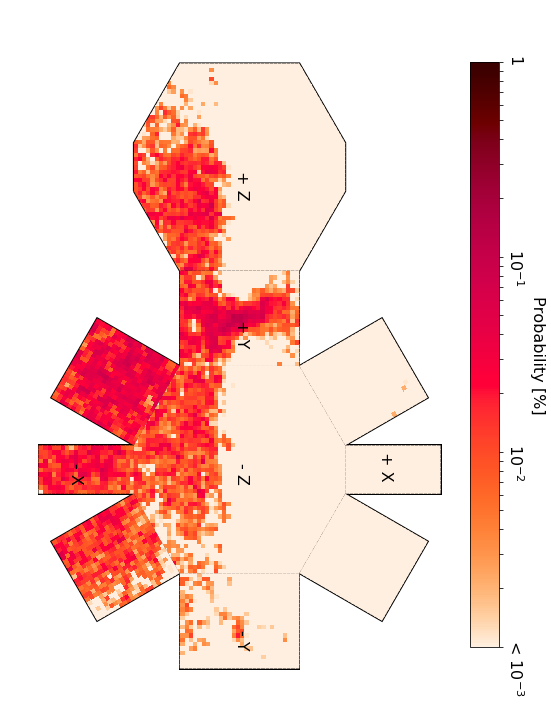

In [55]:

fig = impact1.makeFlatLPF( N = 50, scale = 'log',
                          cmap = 'cylon', show_edge = True)
ax = plt.gca()
ax.set_title('')

norm = LogNorm(vmin = 1e-3, vmax = 1)

# Make Colorbar 
mappable = mpl.cm.ScalarMappable(norm=norm, cmap = 'cylon')
# Do not change 1e-3, it is set inside makeFlatLPF
mappable.set_array([1e-3, 1])
cbar = fig.colorbar(mappable,shrink=0.85,pad = 0.0)

# Set Tick Labels 
old_ticks = cbar.ax.get_yticklabels()
cbar.ax.set_yticklabels([r'< $10^{-3}$'] + old_ticks[1:-1] + ['1'], fontsize = 16, rotation = 270)
cbar.set_label('Probability [%]', rotation=270, fontsize = 16,labelpad = 20)
ax.axis('off')


# Add Face labels
fontsize = 16
rotation = '270'
zorder = 10
plt.text(-0.05, -0.05, '- Z', fontsize=fontsize, rotation = rotation, zorder = 3)
plt.text(-0.05, 2.5, '+ Z', fontsize=fontsize, rotation = rotation, zorder = 3)

plt.text(-1.5, -.05, '- X', fontsize=fontsize, rotation = rotation, zorder = 3)
plt.text(1.2, 0.05, '+ X', fontsize=fontsize, rotation = rotation, zorder = 3)

plt.text(-0.05, 1.2, '+ Y', fontsize=fontsize, rotation = rotation, zorder = 3)
plt.text(-0.05, -1.5, '- Y', fontsize=fontsize, rotation = rotation, zorder = 3)

fig.tight_layout()
fig.savefig(plotDir + 'flatLPF_cbar.eps', format = 'eps')




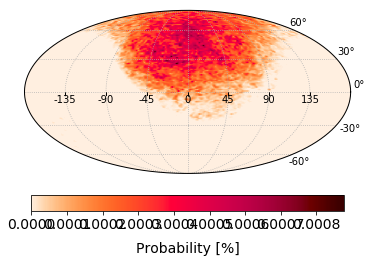

In [71]:
# Molleweide 
fig = plt.figure(figsize=(8, 4), dpi=100)
ax = plt.axes(projection = 'geo degrees mollweide')
impact1.SCtoSun()
impact1.findSkyAngles()
img = ax.imshow_hpx(impact1.healPix_sun, cmap='cylon')
ax.grid(linestyle = ':')
ax.coords[0].set_ticks(exclude_overlapping = True, spacing = 45 * u.deg)
ax.coords[1].set_ticks(exclude_overlapping = True, spacing = 30 * u.deg)
cbar = fig.colorbar(img, orientation = 'horizontal',shrink=0.7,pad = 0.1)

cbar.ax.yaxis.set_major_formatter(mpl.ticker.FormatStrFormatter('%0.2e'))
cbar.set_label('Probability [%]', rotation=0, labelpad=10, fontsize = 14)
cbar.ax.tick_params(labelsize=14)
cbar.ax.yaxis.set_major_formatter


plt.show()
fig.savefig(plotDir + 'skymap_grs1_cbar.eps', format = 'eps')